In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

In [2]:
data = pd.read_excel('data2.xlsx')
data.head()
######################## Some reminders ####################################
# MyData.x                                  # Data of column called "x"
# MyData.iloc[0,:]                          # First row
# MyData.iloc[:,0]                          # First column
# MyData.columns[0]                         # Name of first column
# MyData['Seconds'] = 3600 * MyData.Hours   # Create a new column named as such and caluclated as such

,x1,x2,y
0,0.0,0.0,7.60
1,0.0,0.2,9.24
2,0.0,0.4,10.88
3,0.0,0.6,12.52
4,0.0,0.8,14.16


In [3]:
def act_hill(x, maximal, Kd, n):
    return ((maximal * x**n) / (Kd**n + x**n))

# x1 = TF
# x2 = SM

def equation_to_fit(x1, x2, *args):
    return act_hill(x1, *args[0:3]) + act_hill(x1, *args[3:6]) * act_hill(x2, *args[6:9])
    

In [4]:
a = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
print(equation_to_fit(10, 11, *a))

0.2958312315246867


In [5]:
data.y = equation_to_fit(data.x1, data.x2, *a)
print(data.head())

    x1   x2    y
0  0.0  0.0  0.0
1  0.0  0.2  0.0
2  0.0  0.4  0.0
3  0.0  0.6  0.0
4  0.0  0.8  0.0


In [31]:
# least_squares

In [6]:
def error_function(current_parameter_guess):
    current_parameter_guess = tuple(current_parameter_guess)
    y_guess = equation_to_fit(data.x1, data.x2, *current_parameter_guess) 
    error = y_guess - data.y
    return error

initial_guess = (1, 1, 1, 1, 1, 1, 1, 1, 1)
low_bounds = [0, 0, 0, 0, 0, 0, 0, 0, 0]
up_bounds = [10, 10, 10, 10, 10, 10, 10, 10, 10]
least_squares_fitted_parameters = least_squares(error_function,
                                                initial_guess, 
                                                bounds=(low_bounds, 
                                                up_bounds)
                                                ).x
print(least_squares_fitted_parameters)

[ 0.1         0.2         0.3         0.52915061  0.5         0.6
  0.52914992  0.8         0.9       ]


In [7]:
print(np.mean(error_function(least_squares_fitted_parameters)))
print(np.mean(error_function(a)))


6.308364643331464e-13
0.0


(11, 11)


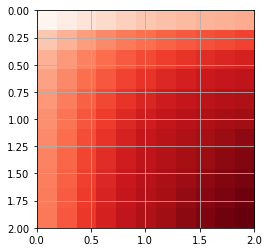

In [25]:
heat = np.empty([11,11])
for a in range(0,11):
    heat[a,:] = data.iloc[a*11:(a+1)*11,2]
print(heat.shape)
plt.imshow(heat, cmap=plt.cm.Reds, interpolation='none', extent=[0,2,2,0])
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [38]:
# Now let's compare them

In [11]:
print('The curve_fit parameters are estimated to be', curve_fit_fitted_parameters)
print('The least_squares parameters are estimated to be', least_squares_fitted_parameters)

The curve_fit parameters are estimated to be [ 0.86923314  8.91546611  1.23210541  0.69330163]
The least_squares parameters are estimated to be [ 0.86923314  8.91546611  1.23210541  0.69330163]


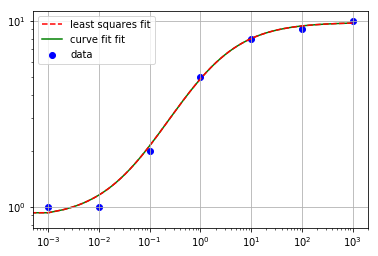

In [13]:
xsmooth = np.linspace(min(data.x), max(data.x), 1000000)
plt.scatter(data.x, data.y, c='b', label='data')
plt.plot(xsmooth, equation_to_fit(xsmooth, *least_squares_fitted_parameters), c='r', label='least squares fit', ls = '--', zorder=1)
plt.plot(xsmooth, equation_to_fit(xsmooth, *curve_fit_fitted_parameters), c='g', label='curve fit fit', zorder=0)

plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()